In [137]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import cross_val_score

In [138]:
Boston=pd.read_csv("boston_house.csv")
col=Boston.columns.str.upper()
Boston.columns=col
Boston.rename(columns={"MEDV":"price"},inplace=True)
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [139]:
df=Boston.copy()
df.info()
#as shown all of them is float and non_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [140]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## exploratary data analysis

In [141]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


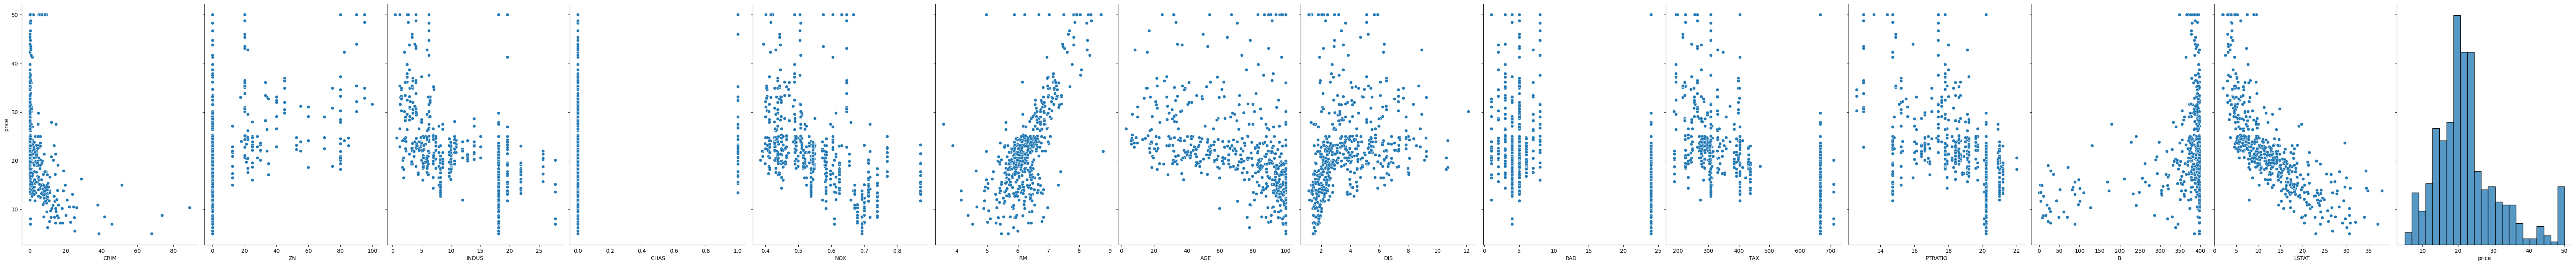

In [142]:
sns.pairplot(df,y_vars="price",size=7, aspect=0.7)


<AxesSubplot:xlabel='RM', ylabel='price'>

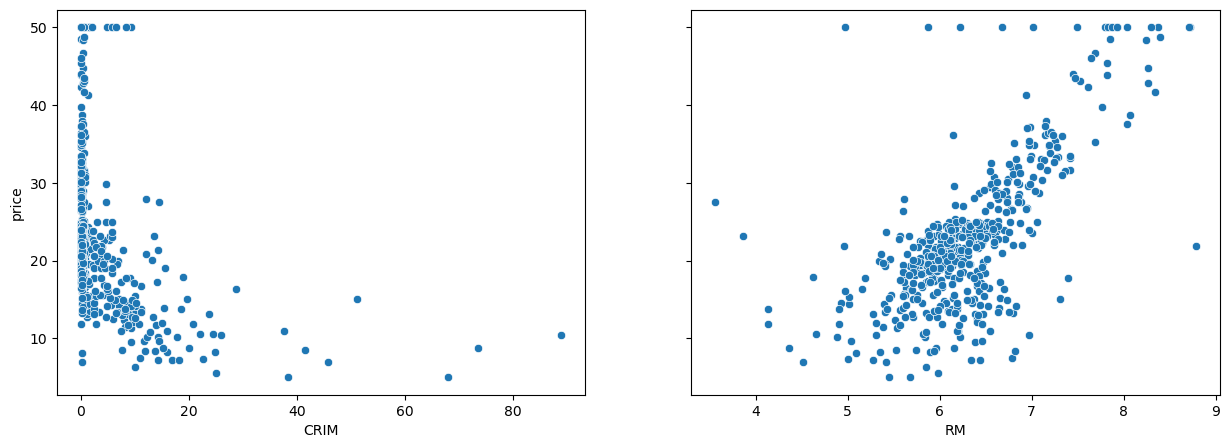

In [143]:
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0] ,x=df["CRIM"],y=df["price"])
sns.scatterplot(ax=axes[1] ,x=df["RM"],y=df["price"])

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

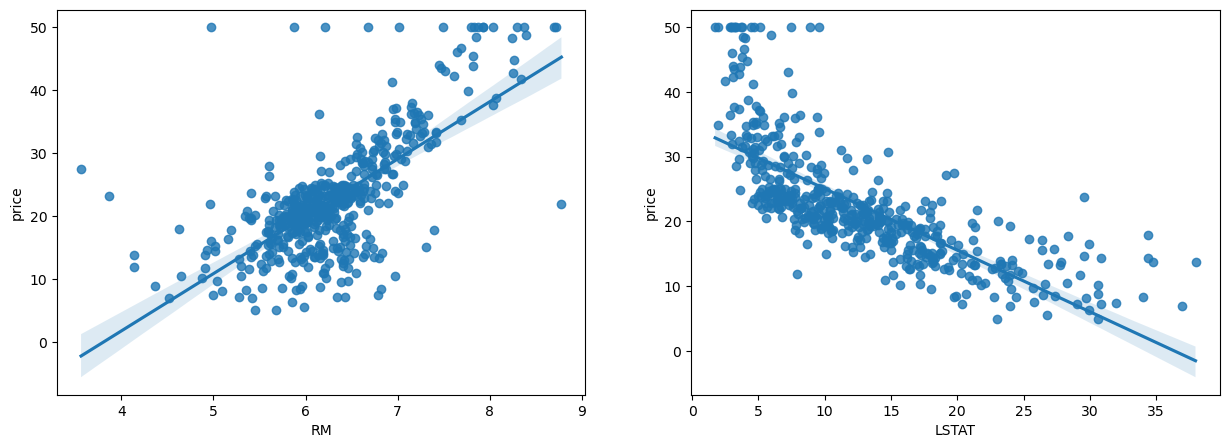

In [144]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.regplot(x=df["RM"],y=df["price"],ax=axes[0],order=1)
sns.regplot(x=df["LSTAT"],y=df["price"],ax=axes[1])

### Outlier detection and removal

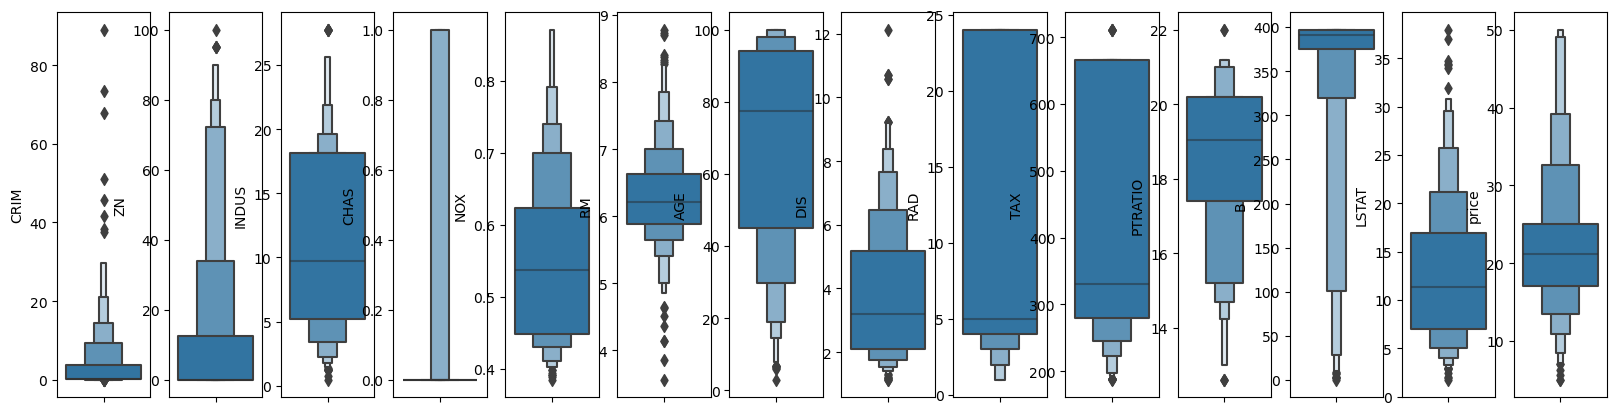

In [145]:
fig,axes=plt.subplots(1,df.shape[1],figsize=(20,5))
j=0
for i in df.columns:
    sns.boxenplot(y=df[i],ax=axes[j])
    j+=1

In [146]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers


Total number of deleted outliers: 7


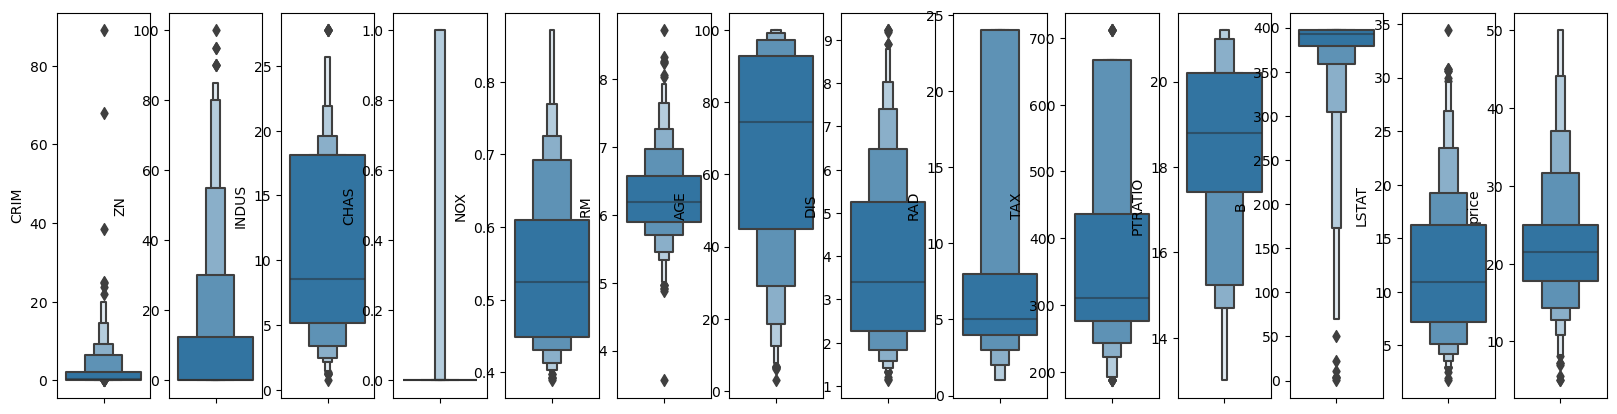

In [147]:

Outliers_IQR = IQR_method(df,1,df.columns[:-1])
# dropping outliers
df2 = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)
df2.shape
fig,axes=plt.subplots(1,df2.shape[1],figsize=(20,5))
j=0
for i in df2.columns:
    sns.boxenplot(y=df2[i],ax=axes[j])
    j+=1

In [148]:
print(df.shape,df2.shape)

(506, 14) (444, 14)


In [149]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
440,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
441,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
442,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
(x_train.shape,x_test.shape)

((310, 13), (134, 13))

In [151]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [152]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [153]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test):
    from statsmodels.stats.diagnostic import normal_ad
    from sklearn import metrics
    p_value_thresh=0.05
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()
    plt.figure(figsize = (10,5))
    sns.regplot(x=y_test,y=y_pred)
    plt.title('Prediction Price for boston house', fontsize = 20)
    ## check linearity
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    fig,axes=plt.subplots(1,2,figsize=(15,5))
    sns.regplot(x=df_results["Actual"],y=df_results["Predicted"],ax=axes[0],order=1,lowess=True,line_kws={'color': 'black'})
    sns.regplot(x=df_results["Predicted"],y=df_results["Residuals"],ax=axes[1],lowess=True,line_kws={'color': 'black'})
    plt.suptitle('check linearity model for boston house', fontsize = 20)
    #### check normality error
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.title('check Normality Model ERROR for boston house', fontsize = 20)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
    #### check normality with normal test
    from scipy.stats import normaltest
# normality test
    stat, p = normaltest(df_results['Residuals'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    #### Homoscedasticity
    p1 = sns.scatterplot(x=y_pred,y=df_results['Residuals'])
    plt.xlabel('y_pred/predicted values')
    plt.ylabel('Residuals')
    plt.ylim(-10,10)
    p1 = sns.lineplot(x=[0,36],y=[0,0],color='blue')
    p1 = plt.title('Residuals vs fitted values plot for homoscedasticity check')
    mean_residuals=df_results["Residuals"].mean()
    print("Mean of Residuals {}".format(mean_residuals))
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )
    return R2, adjusted_r2, CV_R2, RMSE ,mean_residuals,p
    
  


## Modeling with LINEAR REGRESSION

p-value from the test - below 0.05 generally means non-normal: 3.9688571592211e-06
Residuals are not normally distributed


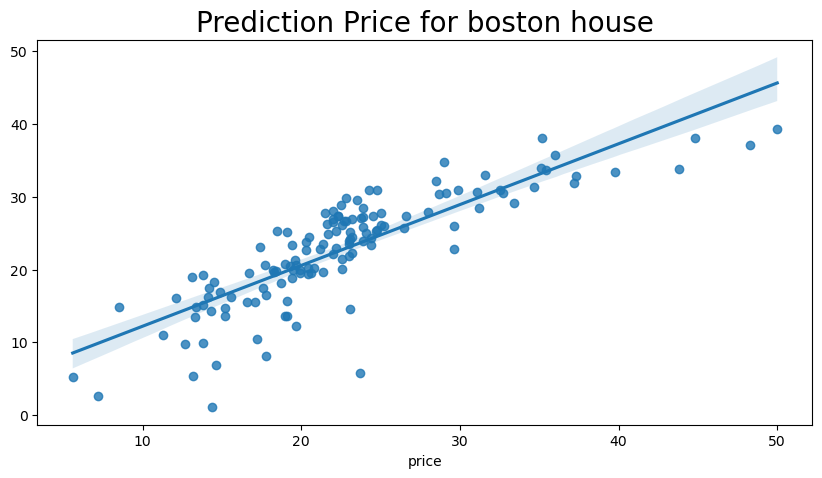

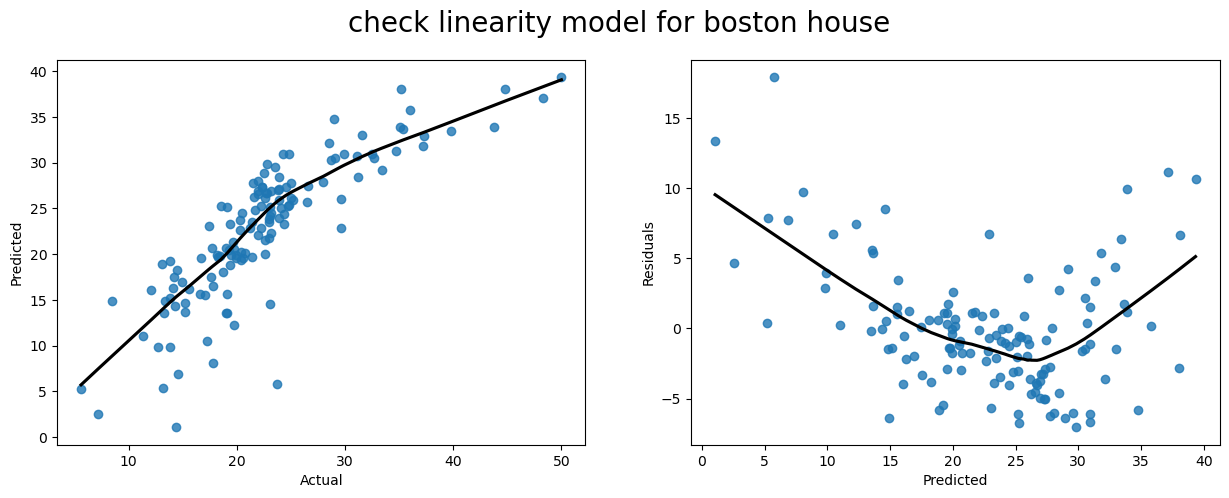

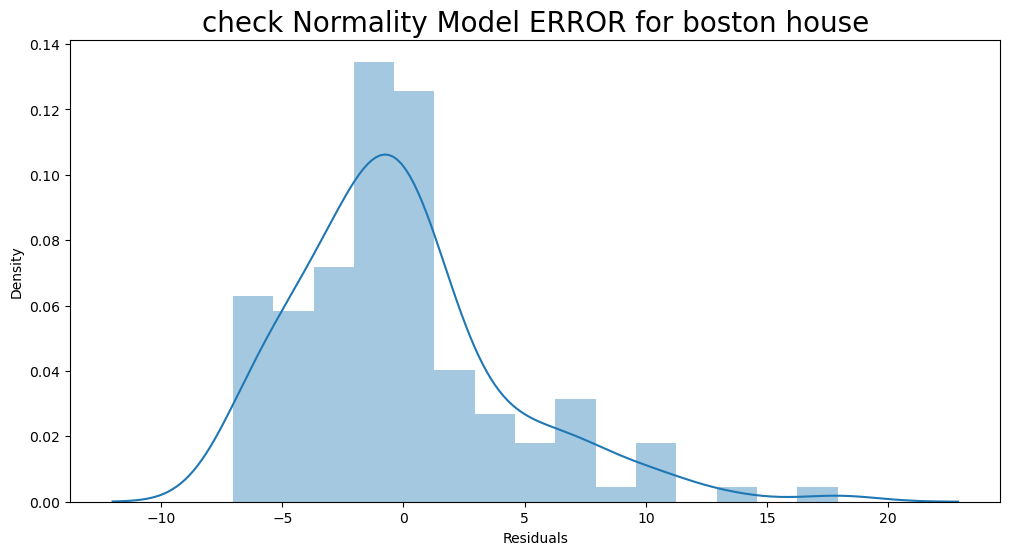


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Statistics=31.240, p=0.000
Sample does not look Gaussian (reject H0)
Mean of Residuals -0.13703899855560442
RMSE: 4.3924
R2: 0.662
Adjusted R2: 0.6254
Cross Validated R2:  0.6814


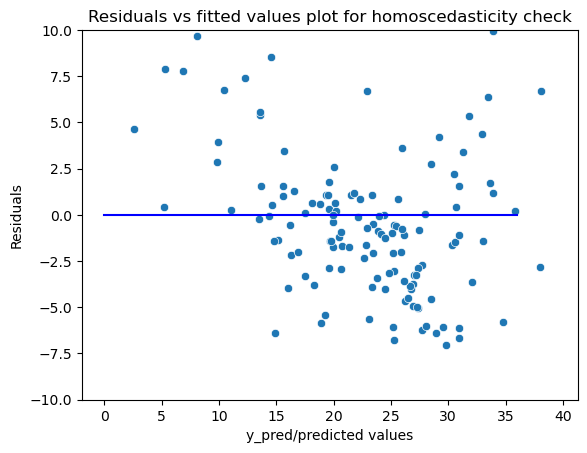

In [154]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
ndf = [Reg_Models_Evaluation_Metrics(lg,x_train,y_train,x_test,y_test)]


In [155]:

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE',"mean_residuals","normal_test"])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,Linear Regression,0.66202,0.625406,0.681446,4.392442,-0.137039,1.645428e-07


## Modeling with RANDOM FOREST


In [156]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10)

p-value from the test - below 0.05 generally means non-normal: 3.681400714488799e-05
Residuals are not normally distributed


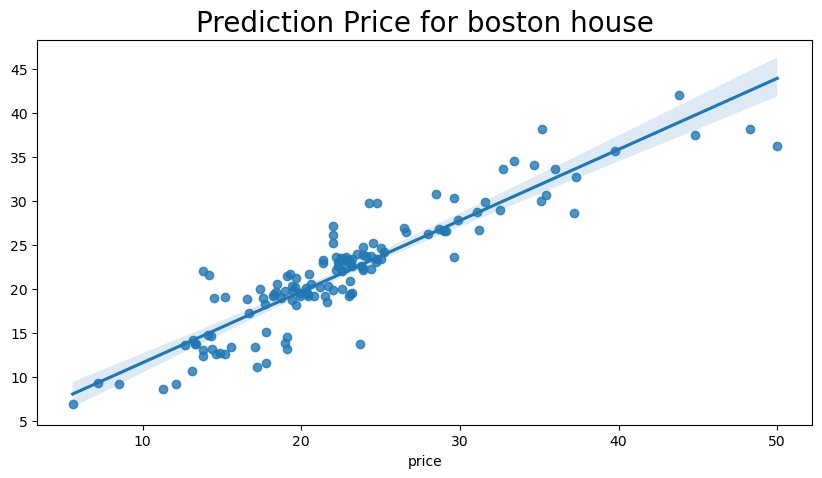

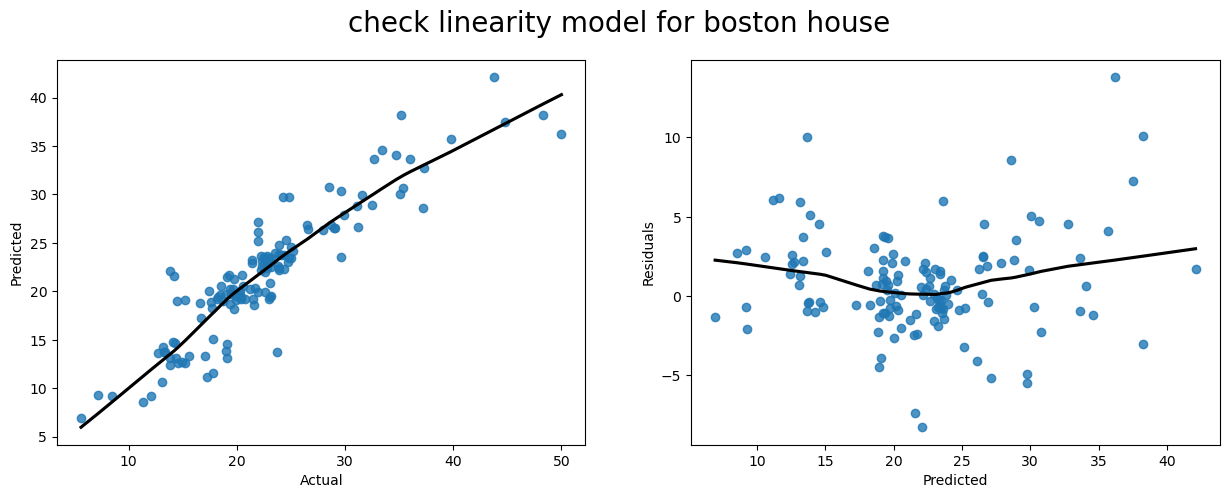

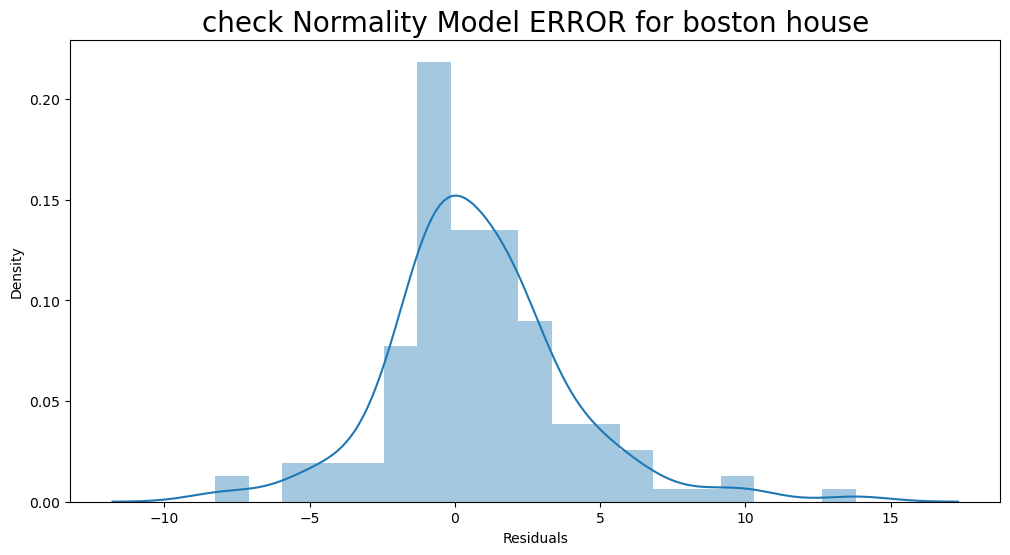


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Statistics=23.481, p=0.000
Sample does not look Gaussian (reject H0)
Mean of Residuals 0.8021641791044772
RMSE: 3.2194
R2: 0.8184
Adjusted R2: 0.7988
Cross Validated R2:  0.8595


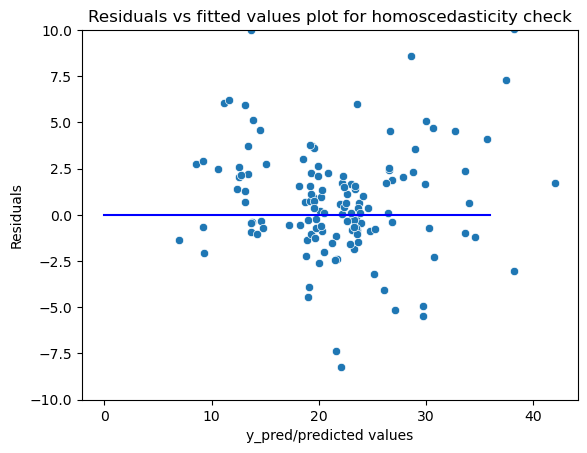

In [157]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,x_train,y_train,x_test,y_test)]


In [158]:
rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE',"mean_residuals","normal_test"])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,Random Forest,0.818439,0.798769,0.859511,3.219383,0.802164,0.000008


## RIDGE REGRESSION

In [159]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")


p-value from the test - below 0.05 generally means non-normal: 3.6782455867369028e-06
Residuals are not normally distributed


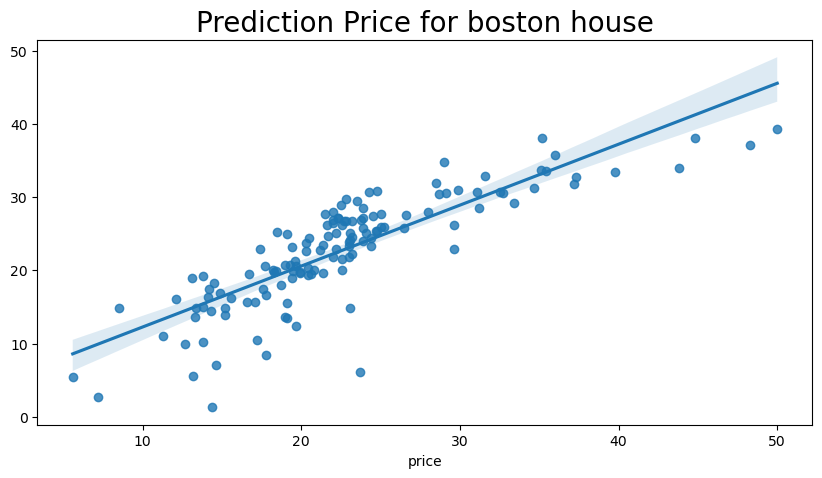

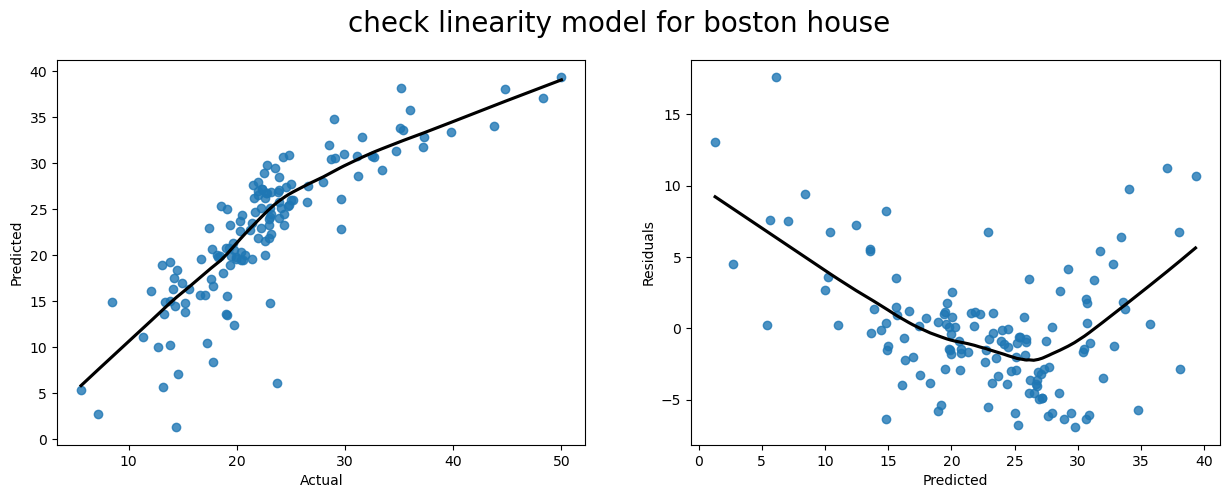

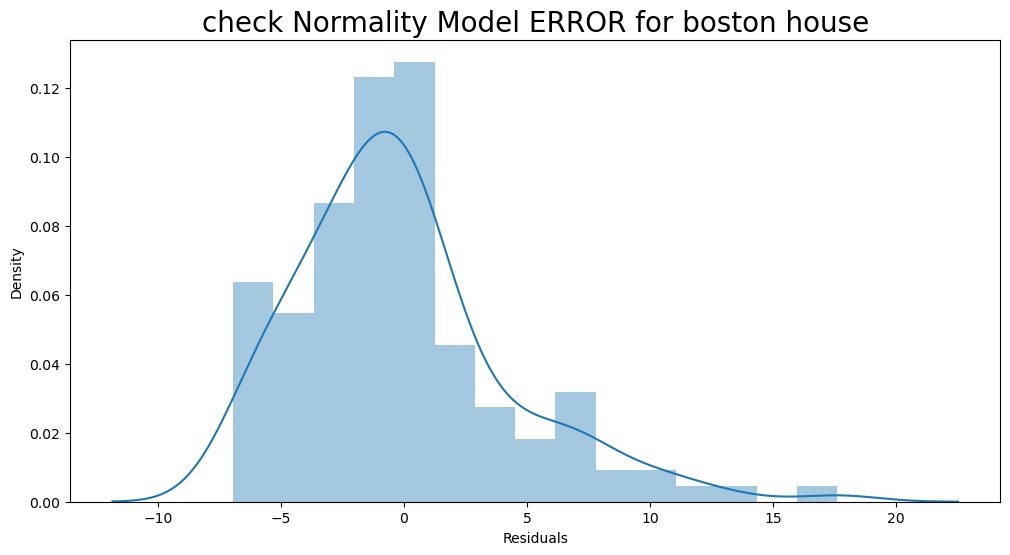


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Statistics=31.029, p=0.000
Sample does not look Gaussian (reject H0)
Mean of Residuals -0.13703899855560503
RMSE: 4.3364
R2: 0.6706
Adjusted R2: 0.6349
Cross Validated R2:  0.6829


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,Ridge Regressor,0.670593,0.634907,0.682949,4.336378,-0.137039,1.828665e-07


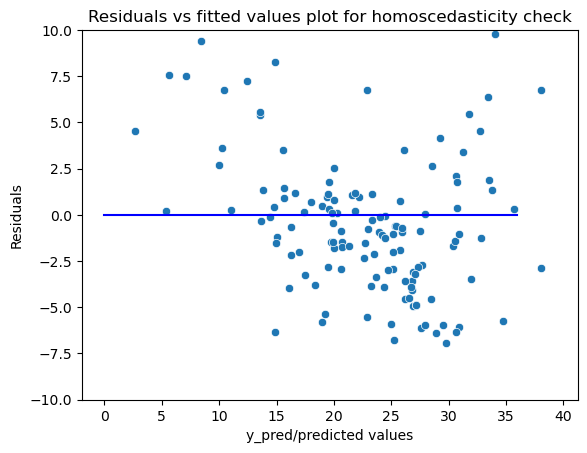

In [160]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,x_train,y_train,x_test,y_test)]
ridge_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE',"mean_residuals","normal_test"])
ridge_score.insert(0, 'Model', 'Ridge Regressor')
ridge_score

## XGB REGRESSOR

In [161]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

p-value from the test - below 0.05 generally means non-normal: 4.754472866196346e-06
Residuals are not normally distributed


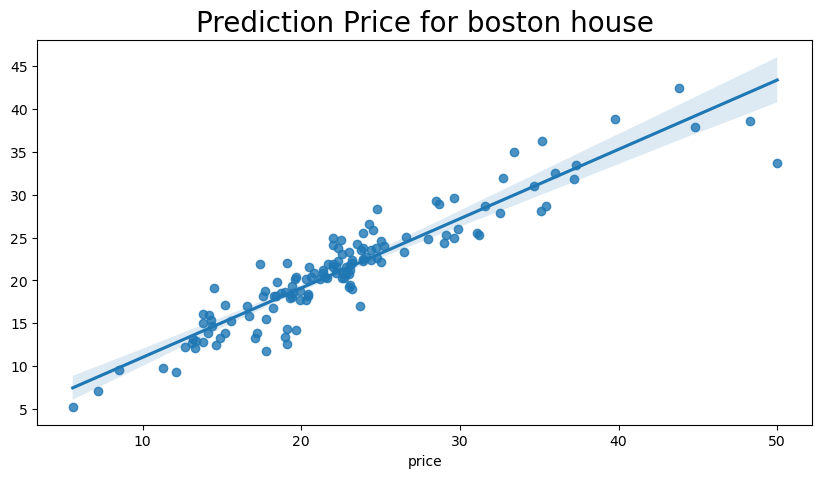

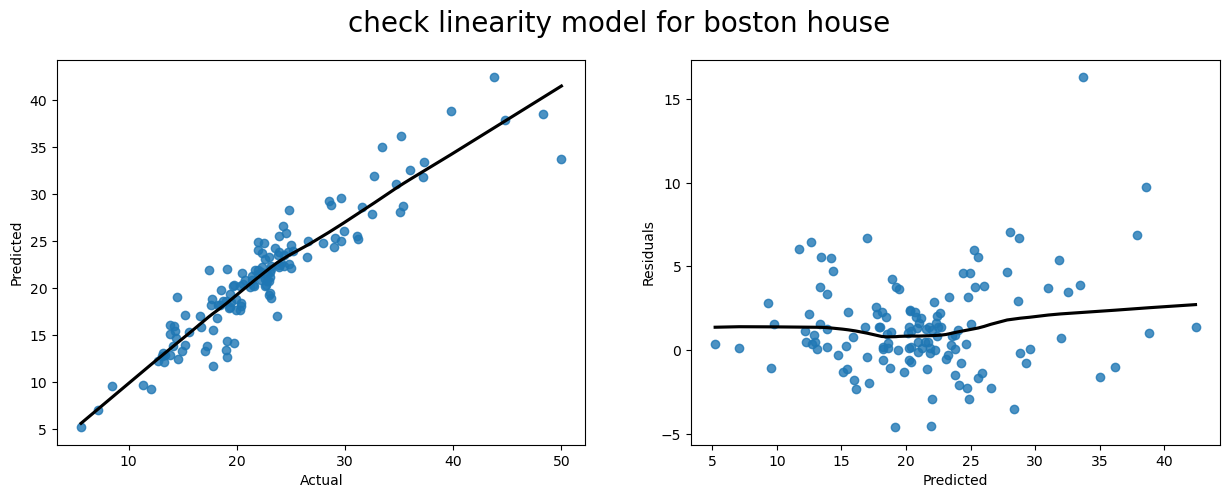

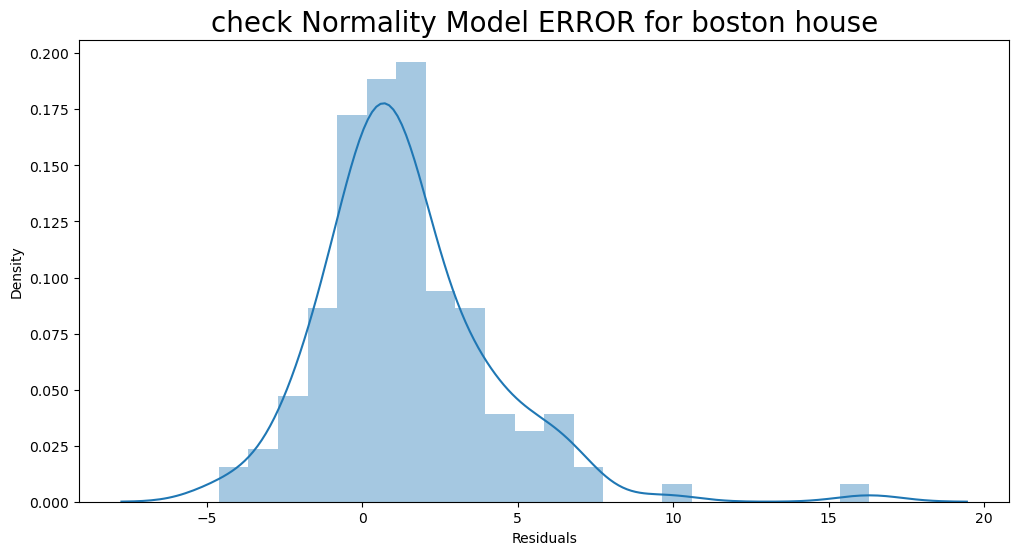


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Statistics=55.517, p=0.000
Sample does not look Gaussian (reject H0)
Mean of Residuals 1.3848622058754536
RMSE: 3.0997
R2: 0.8317
Adjusted R2: 0.8135
Cross Validated R2:  0.8674


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,XGBRegressor,0.831689,0.813455,0.867417,3.099683,1.384862,8.804695e-13


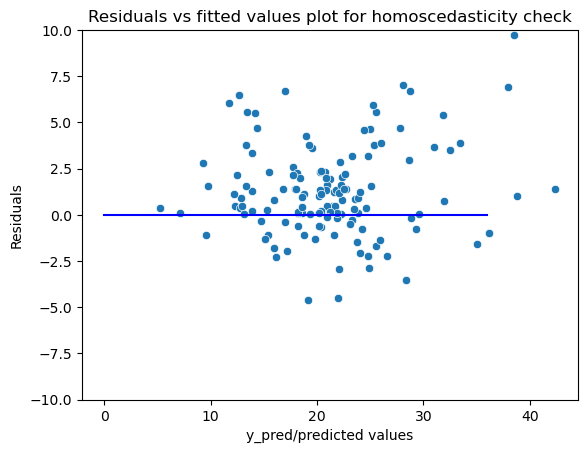

In [162]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,x_train,y_train,x_test,y_test)]
XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE',"mean_residuals","normal_test"])
XGBR_score.insert(0, 'Model', 'XGBRegressor')
XGBR_score

## Recursive Feature Elimination (RFE)

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Random Forest has usually good performance combining with RFE


In [163]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=8)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

p-value from the test - below 0.05 generally means non-normal: 0.005729589106209493
Residuals are not normally distributed


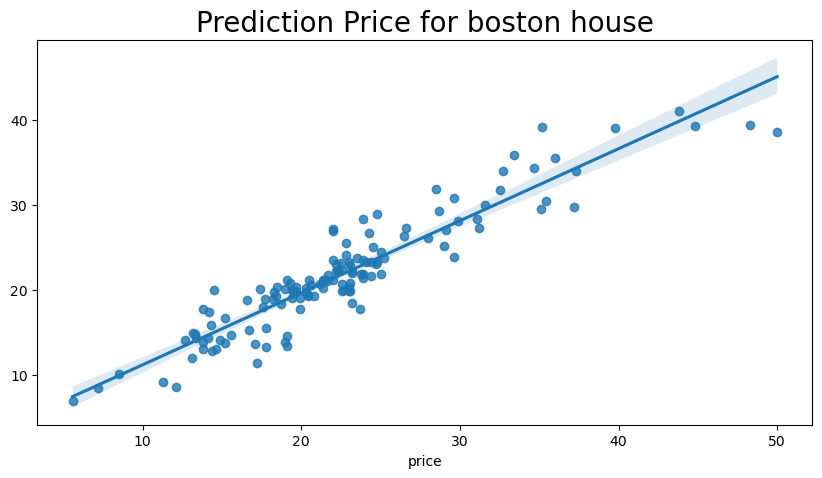

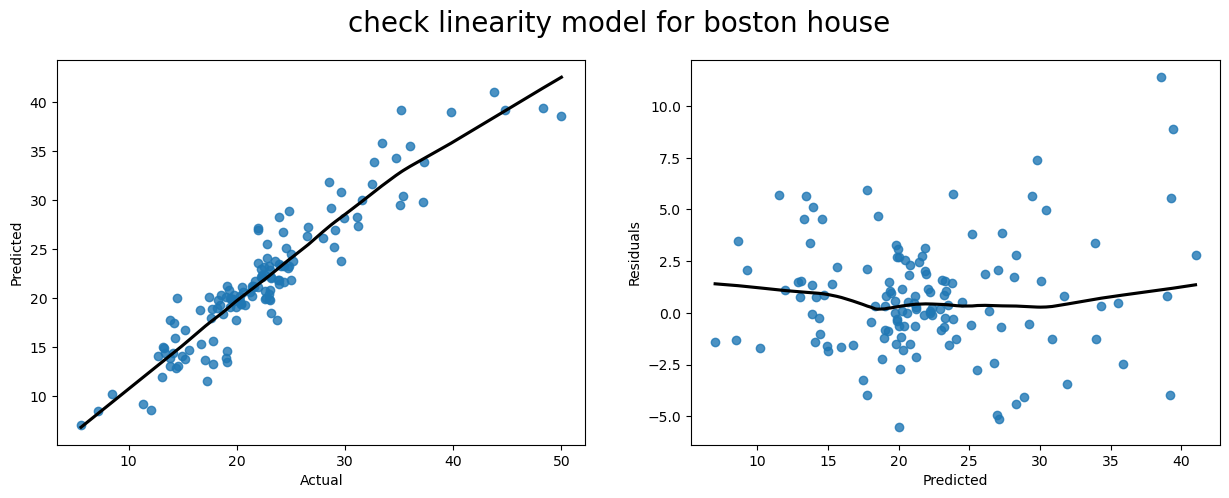

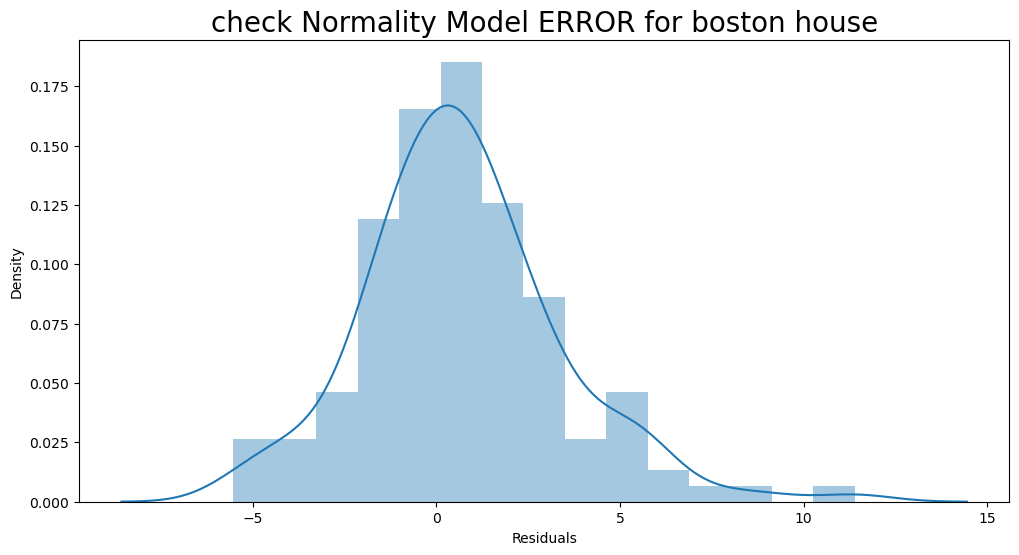


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Statistics=16.770, p=0.000
Sample does not look Gaussian (reject H0)
Mean of Residuals 0.7174925373134369
RMSE: 2.7918
R2: 0.8635
Adjusted R2: 0.8487
Cross Validated R2:  0.8576


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,Random Forest with RFE,0.86346,0.848669,0.857603,2.791838,0.717493,0.000228


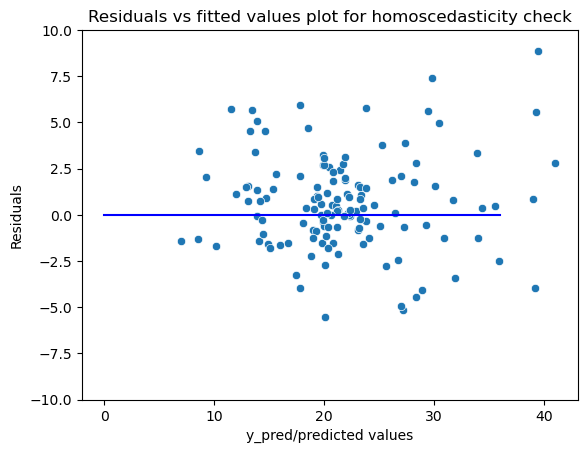

In [164]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,x_train,y_train,x_test,y_test)]
rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE',"mean_residuals","normal_test"])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

In [165]:
predictions = pd.concat([rfe_score, XGBR_score, ridge_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions



,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,mean_residuals,normal_test
0,Random Forest with RFE,0.863460,0.848669,0.857603,2.791838,0.717493,2.282926e-04
1,XGBRegressor,0.831689,0.813455,0.867417,3.099683,1.384862,8.804695e-13
2,Ridge Regressor,0.670593,0.634907,0.682949,4.336378,-0.137039,1.828665e-07
3,Random Forest,0.818439,0.798769,0.859511,3.219383,0.802164,7.966097e-06
4,Linear Regression,0.662020,0.625406,0.681446,4.392442,-0.137039,1.645428e-07


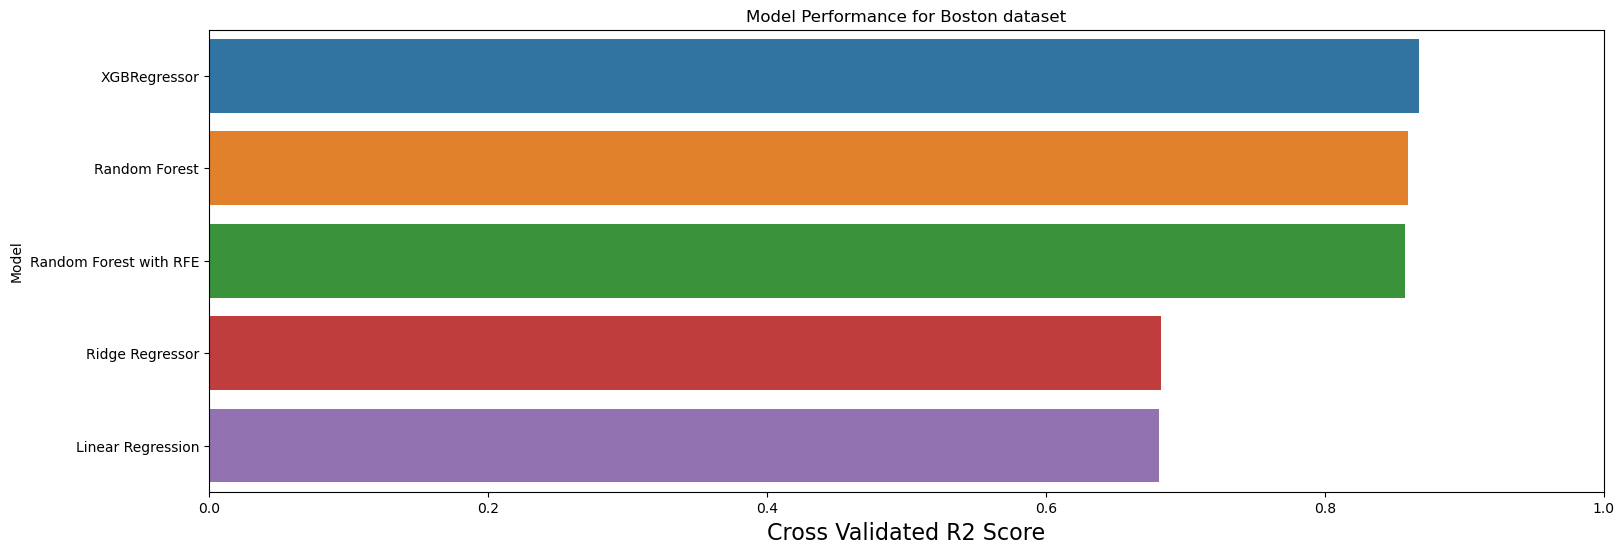

In [166]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Boston dataset')
plt.show()


### we can choose XGBRegressor as our model

In [280]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [281]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
440,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
441,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
442,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)
(x_train.shape,x_test.shape)

((310, 13), (134, 13))

In [288]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [289]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [290]:
import pickle

pickle.dump(model,open("regmodel.pkl","wb"))
pickle.dump(scalar,open("scalarmodel.pkl","wb"))

In [291]:
model_XGB=pickle.load(open("regmodel.pkl","rb"))

In [292]:
model.score(x_test,y_test)

0.8724637171704436

In [255]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
rf_pipeline.fit(x_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(x_test)
rf_pipeline.score(x_test,y_test)

0.8599939684518408

In [256]:
rf_pipeline.predict(y1)

array([26.603])

In [257]:
i=30
xi=x_test[i]

In [258]:
yi=y_test.iloc[i]
yi

8.1

In [259]:
rf_pipeline.predict([xi])

array([13.199])

In [260]:
model_XGB.predict([xi])

array([10.690197], dtype=float32)

In [268]:
s=[[2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9600e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]]



In [293]:
pickle.dump(rf_pipeline,open("rfe.pkl","wb"))


In [296]:
rf_pipeline.predict([[0.02, 0.0, 10.0, 0.0, 0.5, 10.0, 25.0, 10.0, 10.0, 1000.0, 10.0, 100.0, 10.0]])

array([26.767])